In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data
reciept_data = pd.read_csv('data/data_daily.csv')
reciept_data.head(10)

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289
5,2021-01-06,7473320
6,2021-01-07,7832624
7,2021-01-08,7765028
8,2021-01-09,7385245
9,2021-01-10,7392087


In [3]:
reciept_data.describe()

,Receipt_Count
count,3.650000e+02
mean,8.826566e+06
std,7.820089e+05
min,7.095414e+06
25%,8.142874e+06
50%,8.799249e+06
75%,9.476970e+06
max,1.073886e+07


In [4]:
# Filter dataset date time stamps 
reciept_data['month'] = pd.to_datetime(reciept_data['# Date']).dt.month
reciept_data['day'] = pd.to_datetime(reciept_data['# Date']).dt.day
reciept_data['year'] = pd.to_datetime(reciept_data['# Date']).dt.year

In [5]:
reciept_data

,# Date,Receipt_Count,month,day,year
0,2021-01-01,7564766,1,1,2021
1,2021-01-02,7455524,1,2,2021
2,2021-01-03,7095414,1,3,2021
3,2021-01-04,7666163,1,4,2021
4,2021-01-05,7771289,1,5,2021
...,...,...,...,...,...
360,2021-12-27,10350408,12,27,2021
361,2021-12-28,10219445,12,28,2021
362,2021-12-29,10313337,12,29,2021
363,2021-12-30,10310644,12,30,2021


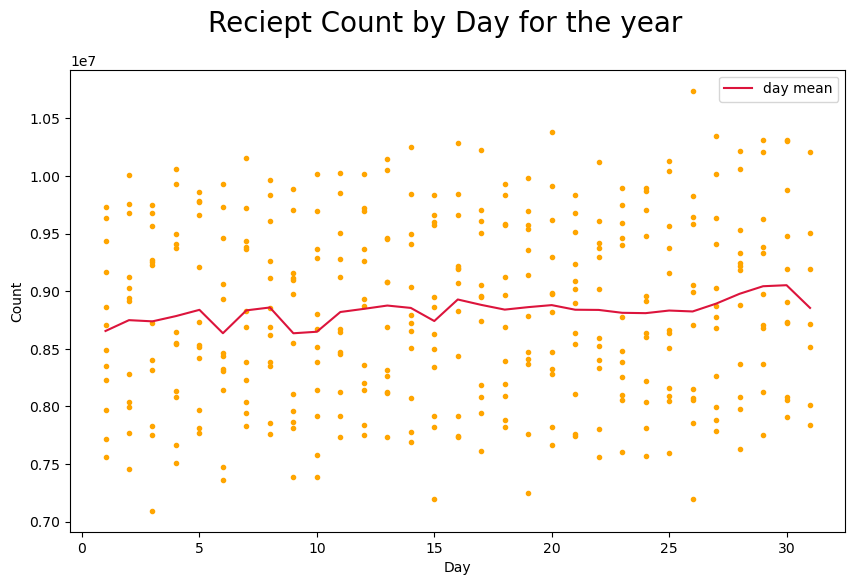

In [6]:
# Overall Plot
day_mean = reciept_data.groupby('day')['Receipt_Count'].mean()

plt.figure(figsize=(10,6))
plt.plot(reciept_data['day'],reciept_data['Receipt_Count'],'.',color = 'orange')
plt.plot(reciept_data['day'].unique(),day_mean, color ='crimson', label='day mean' )
plt.xlabel('Day')
plt.ylabel('Count')
plt.suptitle('Reciept Count by Day for the year', fontsize=20)
plt.legend()
plt.show()

Coefficients: 
 [12088.35339579]
Mean squared error: 605890822572.78


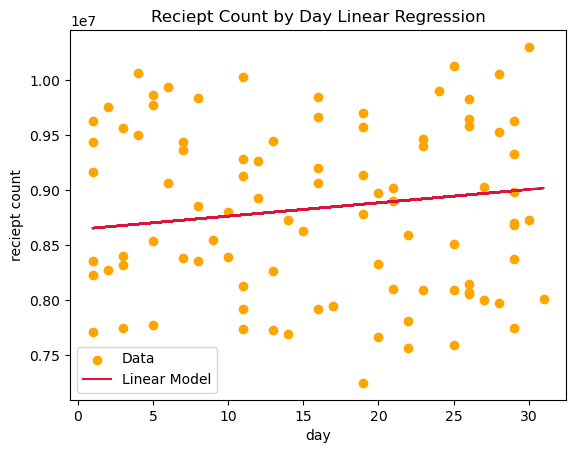

In [7]:
# Base Model  - Simple Linear Regression for Reciept Count by day 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

day_data = reciept_data[['day','Receipt_Count']].sample(frac = 1,ignore_index=True)

X = day_data[['day']]
y = day_data['Receipt_Count']

# Slipt Data - Test & Train 
X_train, X_test, y_train,y_test = train_test_split(X,y)

# Build & Fit Model
linear_model = LinearRegression().fit(X_train,y_train)

# y_hat 
y_predict = linear_model.predict(X_test)

# Model Information 
month_mse = mean_squared_error(y_test,y_predict)
print("Coefficients: \n", linear_model.coef_)
print("Mean squared error: %.2f" % month_mse)

# Plot 
# Plot outputs
plt.scatter(X_test, y_test, color="orange", label = 'Data')
plt.plot(X_test, y_predict, color="crimson", label = 'Linear Model')

plt.title('Reciept Count by Day Linear Regression')
plt.xlabel('day')
plt.ylabel('reciept count')
plt.legend()
plt.show()

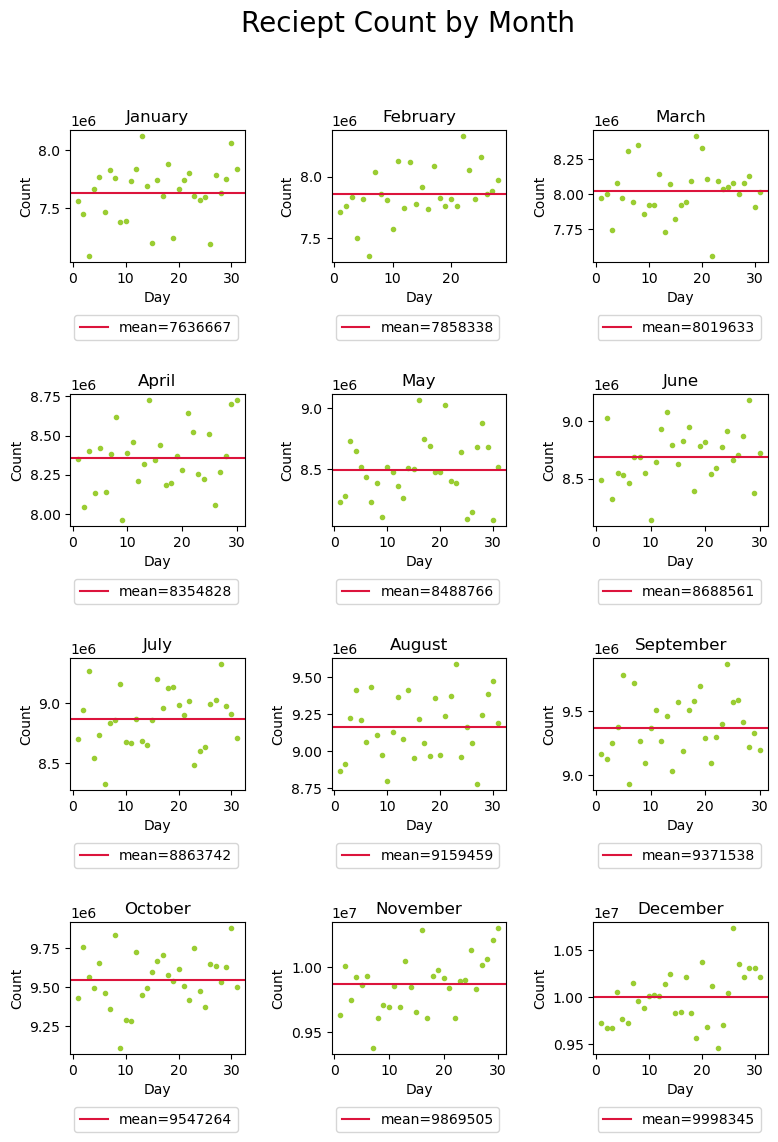

In [8]:
fig, ax = plt.subplots(4,3, figsize = (9,12))
fig.subplots_adjust(hspace = 1, wspace=.5)
ax = ax.flatten()

index = [i for i in range(1,13)]
months = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

for i in index:
    month_rc = reciept_data[reciept_data['month']==i]['Receipt_Count']
    ax[i-1].plot(reciept_data[reciept_data['month']==i]['day'],month_rc,'.', color = 'yellowgreen')
    ax[i-1].axhline(y = month_rc.mean(), color = 'crimson', label = f'mean={round(month_rc.mean())}')
    ax[i-1].set_xlabel('Day')
    ax[i-1].set_ylabel('Count')
    ax[i-1].set_title(f'{months[i-1]}')
    ax[i-1].legend(bbox_to_anchor=(1, -0.35))


fig.suptitle('Reciept Count by Month', fontsize=20)
plt.show()

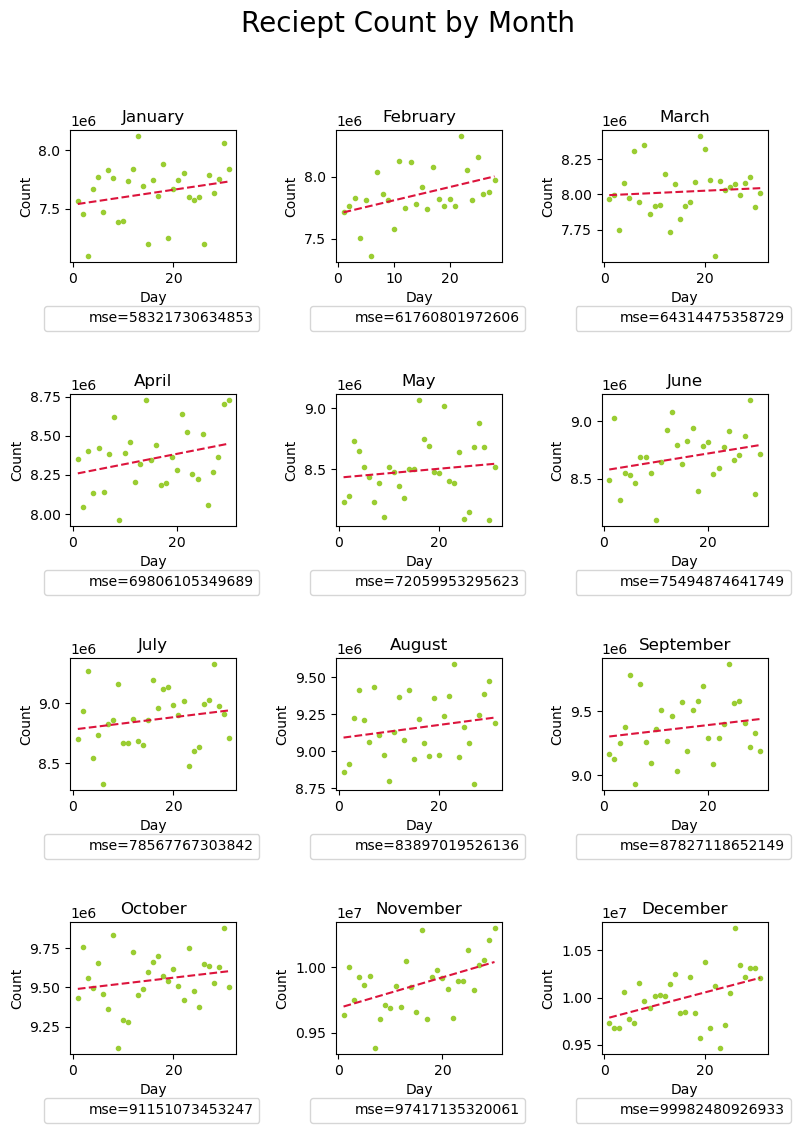

In [9]:
# Base Model - Linear Regression for Reciept Count by month
fig, ax = plt.subplots(4,3, figsize = (9,12))
fig.subplots_adjust(hspace = 1, wspace=.6)
ax = ax.flatten()

index = [i for i in range(1,13)]
months = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
total_mse = 0
for i in index:
    # Get Data
    month_day = reciept_data[reciept_data['month']==i][['day']]
    month_rc = reciept_data[reciept_data['month']==i]['Receipt_Count']
    #print(month_rc.shape,month_day.shape)
    #break
    
    # Slipt Data - Test & Train 
    #X_train, X_test, y_train,y_test = train_test_split(month_rc,month_day)
    
    # Build Model 
    linear_model = LinearRegression().fit(month_day,month_rc)
    
    # Generate Predictions 
    y_predict = linear_model.predict(month_day)
    total_mse += mean_squared_error(month_day,y_predict)
    
    
    # Plot Data 
    ax[i-1].plot(month_day,month_rc,'.', color = 'yellowgreen')
    ax[i-1].plot(month_day,y_predict, '--', color = 'crimson')
    ax[i-1].plot([], [], ' ', label=f'mse={round(mean_squared_error(month_day,y_predict))}')
    ax[i-1].set_xlabel('Day')
    ax[i-1].set_ylabel('Count')
    ax[i-1].set_title(f'{months[i-1]}')
    ax[i-1].legend(bbox_to_anchor=(1.18, -0.28))


fig.suptitle('Reciept Count by Month', fontsize=20)
plt.show()


In [10]:
# Base Model - Linear Regression of month and day  (implement cross -validation )
data = reciept_data[['day','Receipt_Count','month']].sample(frac = 1,ignore_index=True)

X = data[['day','month']]
y = data['Receipt_Count']

# Slipt Data - Test & Train 
X_train, X_test, y_train,y_test = train_test_split(X,y)

# Build & Fit Model
linear_model = LinearRegression().fit(X_train,y_train)

# y_hat 
y_predict = linear_model.predict(X_test)

# Model Information 
mse = mean_squared_error(y_test,y_predict)
print("Coefficients: \n", linear_model.coef_)
print("Mean squared error: %.2f" % month_mse)


Coefficients: 
 [  5263.23855937 216054.83727512]
Mean squared error: 605890822572.78


In [11]:
month_mse > mse

True

In [12]:
# Base Model 2 - Polynomial Regression 
# implement cross validation 